<a href="https://colab.research.google.com/github/KeiandraK/DS-Unit-1-Sprint-2-Statistics/blob/master/Keiandra_King_LS_DS_121_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 2 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [101]:
import numpy as np
import pandas as pd

political_data_url= 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
democrat,n,y,n,y,y,y,n,n,n,n,n,n,?,y,y,y
republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,?,y
republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,?,?
republican,n,y,n,y,y,n,n,n,n,n,?,?,y,y,n,n
republican,n,y,n,y,y,y,n,n,n,n,y,?,y,y,?,?
democrat,n,y,y,n,n,n,y,y,y,n,n,n,y,n,?,?
democrat,y,y,y,n,n,y,y,y,?,y,y,?,n,n,y,?
republican,n,y,n,y,y,y,n,n,n,n,n,y,?,?,n,?
republican,n,y,n,y,y,y,n,n,n,y,n,y,y,?,n,?
democrat,y,n,y,n,n,y,n,y,?,y,y,y,?,n,n,y
democrat,y,?,y,n,n,n,y,y,y,n,n,n,y,n,y,y
republican,n,y,n,y,y,y,n,n,n,n,n,?,y,y,n,n
democrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y
democrat,y,y,y,n,n,?,y,y,n,n,y,n,n,n,y,y
democrat,y,y,y,n,n,n,y,y,y,n,n,n,?,?,y,y
democrat,y,?,y,n,n,n,y,y,y,n,n,?,n,n,y,y
democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,

In [0]:
poll_abs_data= pd.read_csv(political_data_url)

In [103]:
print(poll_abs_data.shape)
poll_abs_data.head(10)

(434, 17)


,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
5,democrat,n,y,n,y,y,y,n,n,n,n,n,n,?,y,y,y
6,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,?,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
8,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,?,?
9,republican,n,y,n,y,y,n,n,n,n,n,?,?,y,y,n,n


In [0]:
column_headers= ['Party','Handicapped-infants','Water-project-cost-sharing','Adoption-of-the-budget-resolution', 
                 'Physician-fee-freeze', 'El-Salvador-aid','Religious-groups-in-schools',
                 'Anti-satellite-test-ban','Aid-to-nicaraguan-contras','MX-missile','Immigration','Synfuels-corporation-cutback',
                 'Education-spending','Superfund-right-to-sue','Crime','Duty-free-exports','Export-administration-act-south-africa']

In [105]:
poll_abs_data=pd.read_csv(political_data_url, header=None, names=column_headers)
print(poll_abs_data.shape)
poll_abs_data.head()

(435, 17)


,Party,Handicapped-infants,Water-project-cost-sharing,Adoption-of-the-budget-resolution,Physician-fee-freeze,El-Salvador-aid,Religious-groups-in-schools,Anti-satellite-test-ban,Aid-to-nicaraguan-contras,MX-missile,Immigration,Synfuels-corporation-cutback,Education-spending,Superfund-right-to-sue,Crime,Duty-free-exports,Export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [106]:
np.NaN
poll_abs_data=poll_abs_data.replace("?", np.NaN)
poll_abs_data.head()

,Party,Handicapped-infants,Water-project-cost-sharing,Adoption-of-the-budget-resolution,Physician-fee-freeze,El-Salvador-aid,Religious-groups-in-schools,Anti-satellite-test-ban,Aid-to-nicaraguan-contras,MX-missile,Immigration,Synfuels-corporation-cutback,Education-spending,Superfund-right-to-sue,Crime,Duty-free-exports,Export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [107]:
poll_abs_data=poll_abs_data.replace({'n':0, 'y':1})
poll_abs_data.head()

,Party,Handicapped-infants,Water-project-cost-sharing,Adoption-of-the-budget-resolution,Physician-fee-freeze,El-Salvador-aid,Religious-groups-in-schools,Anti-satellite-test-ban,Aid-to-nicaraguan-contras,MX-missile,Immigration,Synfuels-corporation-cutback,Education-spending,Superfund-right-to-sue,Crime,Duty-free-exports,Export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [108]:
poll_abs_data.isnull().sum()

Party                                       0
Handicapped-infants                        12
Water-project-cost-sharing                 48
Adoption-of-the-budget-resolution          11
Physician-fee-freeze                       11
El-Salvador-aid                            15
Religious-groups-in-schools                11
Anti-satellite-test-ban                    14
Aid-to-nicaraguan-contras                  15
MX-missile                                 22
Immigration                                 7
Synfuels-corporation-cutback               21
Education-spending                         31
Superfund-right-to-sue                     25
Crime                                      17
Duty-free-exports                          28
Export-administration-act-south-africa    104
dtype: int64

In [109]:
mu = 0 # mean
sigma = 0.01 # standard deviation

sample = np.random.normal(mu, sigma, 1000)

# Verify the mean of our sample
abs(mu - np.mean(poll_abs_data)) < 0.01

Handicapped-infants                       False
Water-project-cost-sharing                False
Adoption-of-the-budget-resolution         False
Physician-fee-freeze                      False
El-Salvador-aid                           False
Religious-groups-in-schools               False
Anti-satellite-test-ban                   False
Aid-to-nicaraguan-contras                 False
MX-missile                                False
Immigration                               False
Synfuels-corporation-cutback              False
Education-spending                        False
Superfund-right-to-sue                    False
Crime                                     False
Duty-free-exports                         False
Export-administration-act-south-africa    False
dtype: bool

In [121]:
np.mean(poll_abs_data)

Handicapped-infants                       0.442080
Water-project-cost-sharing                0.503876
Adoption-of-the-budget-resolution         0.596698
Physician-fee-freeze                      0.417453
El-Salvador-aid                           0.504762
Religious-groups-in-schools               0.641509
Anti-satellite-test-ban                   0.567696
Aid-to-nicaraguan-contras                 0.576190
MX-missile                                0.501211
Immigration                               0.504673
Synfuels-corporation-cutback              0.362319
Education-spending                        0.423267
Superfund-right-to-sue                    0.509756
Crime                                     0.593301
Duty-free-exports                         0.427518
Export-administration-act-south-africa    0.812689
dtype: float64

In [122]:
abs(sigma - np.std(poll_abs_data, ddof=1)) < 0.01

Handicapped-infants                       False
Water-project-cost-sharing                False
Adoption-of-the-budget-resolution         False
Physician-fee-freeze                      False
El-Salvador-aid                           False
Religious-groups-in-schools               False
Anti-satellite-test-ban                   False
Aid-to-nicaraguan-contras                 False
MX-missile                                False
Immigration                               False
Synfuels-corporation-cutback              False
Education-spending                        False
Superfund-right-to-sue                    False
Crime                                     False
Duty-free-exports                         False
Export-administration-act-south-africa    False
dtype: bool

In [110]:
poll_abs_data.describe()

,Handicapped-infants,Water-project-cost-sharing,Adoption-of-the-budget-resolution,Physician-fee-freeze,El-Salvador-aid,Religious-groups-in-schools,Anti-satellite-test-ban,Aid-to-nicaraguan-contras,MX-missile,Immigration,Synfuels-corporation-cutback,Education-spending,Superfund-right-to-sue,Crime,Duty-free-exports,Export-administration-act-south-africa
count,423.000000,387.000000,424.000000,424.000000,420.000000,424.000000,421.000000,420.00000,413.000000,428.000000,414.000000,404.000000,410.000000,418.000000,407.000000,331.000000
mean,0.442080,0.503876,0.596698,0.417453,0.504762,0.641509,0.567696,0.57619,0.501211,0.504673,0.362319,0.423267,0.509756,0.593301,0.427518,0.812689
std,0.497222,0.500632,0.491140,0.493721,0.500574,0.480124,0.495985,0.49475,0.500605,0.500563,0.481252,0.494690,0.500516,0.491806,0.495327,0.390752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [111]:
dems=poll_abs_data[poll_abs_data.Party=="democrat"]
print(dems.shape)
dems.head()

(267, 17)


,Party,Handicapped-infants,Water-project-cost-sharing,Adoption-of-the-budget-resolution,Physician-fee-freeze,El-Salvador-aid,Religious-groups-in-schools,Anti-satellite-test-ban,Aid-to-nicaraguan-contras,MX-missile,Immigration,Synfuels-corporation-cutback,Education-spending,Superfund-right-to-sue,Crime,Duty-free-exports,Export-administration-act-south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [112]:
reps=poll_abs_data[poll_abs_data.Party=="republican"]
print(reps.shape)
reps.head()

(168, 17)


,Party,Handicapped-infants,Water-project-cost-sharing,Adoption-of-the-budget-resolution,Physician-fee-freeze,El-Salvador-aid,Religious-groups-in-schools,Anti-satellite-test-ban,Aid-to-nicaraguan-contras,MX-missile,Immigration,Synfuels-corporation-cutback,Education-spending,Superfund-right-to-sue,Crime,Duty-free-exports,Export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [113]:
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
dems['Duty-free-exports'].mean()

0.6374501992031872

***The Column 'Duty-free-exports' is up for testing***

In [114]:
reps['Duty-free-exports'].mean()

0.08974358974358974

In [115]:
ttest_1samp(dems['Duty-free-exports'], 0.01, nan_policy='omit')

Ttest_1sampResult(statistic=20.636797366916866, pvalue=6.468916914264755e-56)

In [116]:
ttest_1samp(reps['Duty-free-exports'],0.01,nan_policy='omit')

Ttest_1sampResult(statistic=3.4735858694951736, pvalue=0.0006659256527530465)

In [117]:
#Running a Ttest with 2 samps
ttest_ind(dems['Duty-free-exports'], reps['Duty-free-exports'],
          nan_policy='omit')

Ttest_indResult(statistic=12.853146132542978, pvalue=5.997697174347365e-32)

***"Immigration is the next column of data I am testing***

In [118]:
reps['Immigration'].mean()

0.5575757575757576

In [119]:
dems['Immigration'].mean()


0.4714828897338403

In [124]:
ttest_1samp(dems['Immigration'], 0.01, nan_policy='omit')

Ttest_1sampResult(statistic=14.963864084775844, pvalue=5.206147515096551e-37)

In [125]:
ttest_1samp(reps['Immigration'], 0.01, nan_policy='omit')

Ttest_1sampResult(statistic=14.118700875553005, pvalue=3.9248769158651534e-30)

In [140]:
ttest_ind(dems['Immigration'], reps['Immigration'],
          nan_policy='omit')
# Null Hypothesis was proven False

Ttest_indResult(statistic=-1.7359117329695164, pvalue=0.08330248490425066)

In [127]:
dems.mean()

Handicapped-infants                       0.604651
Water-project-cost-sharing                0.502092
Adoption-of-the-budget-resolution         0.888462
Physician-fee-freeze                      0.054054
El-Salvador-aid                           0.215686
Religious-groups-in-schools               0.476744
Anti-satellite-test-ban                   0.772201
Aid-to-nicaraguan-contras                 0.828897
MX-missile                                0.758065
Immigration                               0.471483
Synfuels-corporation-cutback              0.505882
Education-spending                        0.144578
Superfund-right-to-sue                    0.289683
Crime                                     0.350195
Duty-free-exports                         0.637450
Export-administration-act-south-africa    0.935135
dtype: float64

In [128]:
reps.mean()

Handicapped-infants                       0.187879
Water-project-cost-sharing                0.506757
Adoption-of-the-budget-resolution         0.134146
Physician-fee-freeze                      0.987879
El-Salvador-aid                           0.951515
Religious-groups-in-schools               0.897590
Anti-satellite-test-ban                   0.240741
Aid-to-nicaraguan-contras                 0.152866
MX-missile                                0.115152
Immigration                               0.557576
Synfuels-corporation-cutback              0.132075
Education-spending                        0.870968
Superfund-right-to-sue                    0.860759
Crime                                     0.981366
Duty-free-exports                         0.089744
Export-administration-act-south-africa    0.657534
dtype: float64

In [130]:
ttest_1samp(reps['Superfund-right-to-sue'], 0.01, nan_policy='omit')

Ttest_1sampResult(statistic=30.7916472392414, pvalue=2.025029327879914e-68)

In [131]:
ttest_1samp(dems['Superfund-right-to-sue'], 0.01, nan_policy='omit')

Ttest_1sampResult(statistic=9.768206017994263, pvalue=2.608979033171928e-19)

In [133]:
ttest_ind(reps['Superfund-right-to-sue'], dems['Superfund-right-to-sue'],
          nan_policy='omit')

Ttest_indResult(statistic=13.51064251060933, pvalue=1.2278581709672758e-34)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


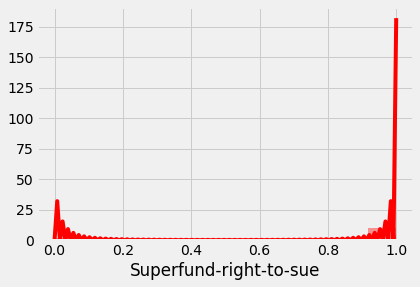

In [138]:
style.use('fivethirtyeight')

ax = sns.distplot(reps['Superfund-right-to-sue'], color='r')
ax.axvline(np.percentile(reps['Superfund-right-to-sue'],97.5),0)
ax.axvline(np.percentile(reps['Superfund-right-to-sue'], 2.5),0);

# Null Hypothesis was proven False
